In [39]:
#LG 세탁기 데이터 분석

### 1 작업환경 설정하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#화면에 보이는 테이블 정보량 설정

pd.set_option('max_rows', 30)



In [63]:
### 2 데이터 탐색
washer = pd.read_csv('data/washing_machine/washer.csv')
washer.shape

(500, 32)

In [41]:
metadata = pd.read_csv('data/washing_machine/metadata.csv')
metadata.shape

(32, 2)

In [64]:
washer.columns

Index(['category_code', 'model_name', 'regist_country', 'create_dt_utc',
       'device_id', 'event_type', 'mon_data', 'State', 'Remain_Time_H',
       'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M', 'APCourse',
       'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp', 'RinseCount',
       'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M', 'FreshCare',
       'ChildLock', 'Steam', 'RemoteStart', 'TurboShot', 'InitialBit',
       'PreState', 'SmartCourse', 'TCLCount', 'OPCourse', 'LoadLevel'],
      dtype='object')

In [68]:
washer = washer.drop(columns = 'category_code')

In [69]:
washer.columns


Index(['model_name', 'regist_country', 'create_dt_utc', 'device_id',
       'event_type', 'mon_data', 'State', 'Remain_Time_H', 'Remain_Time_M',
       'Initial_Time_H', 'Initial_Time_M', 'APCourse', 'Error', 'SoilLevel',
       'SpinSpeed', 'WaterTemp', 'RinseCount', 'DryLevel', 'Reserve_Time_H',
       'Reserve_Time_M', 'FreshCare', 'ChildLock', 'Steam', 'RemoteStart',
       'TurboShot', 'InitialBit', 'PreState', 'SmartCourse', 'TCLCount',
       'OPCourse', 'LoadLevel'],
      dtype='object')

In [50]:
lst = ['Error', 'Reserve_Time_H', 'Reserve_Time_M']

washer = washer.drop(lst, axis=1)

In [51]:
washer.shape

(500, 29)

In [70]:
washer = washer[['device_id', 'create_dt_utc', 'event_type', 'APCourse']]

In [71]:
washer

,device_id,create_dt_utc,event_type,APCourse
0,A1,16/11/2017 0:22,WM_STATE,1
1,A1,16/11/2017 0:32,WM_STATE,0
2,A1,16/11/2017 0:32,WM_WASH_END,0
3,A1,16/11/2017 2:48,COMMON_WIFI_ON,1
4,A1,16/11/2017 2:57,WM_STATE,0
5,A1,16/11/2017 2:57,WM_WASH_END,0
6,A1,16/11/2017 2:58,WM_WASH_BEGIN,1
7,A1,16/11/2017 2:58,WM_STATE,1
8,A1,16/11/2017 3:26,WM_STATE,1
9,A1,16/11/2017 3:57,WM_STATE,0


In [ ]:
### grouping 
### 로그가 발생한 디바이스 id 별 event_type이 어떤것들이 있는지

In [72]:
washer['event_type'].value_counts()

WM_STATE          294
COMMON_WIFI_ON     65
WM_WASH_END        64
WM_WASH_BEGIN      40
WM_PAUSE           23
WM_CONTINUE        11
WM_ERROR            3
Name: event_type, dtype: int64

In [75]:
washer['device_id'].unique()
washer['device_id'].value_counts()

A1    108
A3    104
A4    100
A2     96
A5     92
Name: device_id, dtype: int64

In [77]:
washer.groupby('device_id').size()

device_id
A1    108
A2     96
A3    104
A4    100
A5     92
dtype: int64

In [79]:
washer.groupby(['device_id','event_type']).size()

device_id  event_type    
A1         COMMON_WIFI_ON    13
           WM_PAUSE           2
           WM_STATE          64
           WM_WASH_BEGIN     12
           WM_WASH_END       17
A2         COMMON_WIFI_ON    13
           WM_CONTINUE        2
           WM_PAUSE           7
           WM_STATE          60
           WM_WASH_BEGIN      2
           WM_WASH_END       12
A3         COMMON_WIFI_ON    11
           WM_CONTINUE        9
           WM_ERROR           2
           WM_PAUSE          12
           WM_STATE          51
           WM_WASH_BEGIN      8
           WM_WASH_END       11
A4         COMMON_WIFI_ON    16
           WM_STATE          62
           WM_WASH_BEGIN     10
           WM_WASH_END       12
A5         COMMON_WIFI_ON    12
           WM_ERROR           1
           WM_PAUSE           2
           WM_STATE          57
           WM_WASH_BEGIN      8
           WM_WASH_END       12
dtype: int64

In [82]:
washer.groupby(['device_id','event_type']).size().unstack(fill_value=0)

event_type,COMMON_WIFI_ON,WM_CONTINUE,WM_ERROR,WM_PAUSE,WM_STATE,WM_WASH_BEGIN,WM_WASH_END
device_id,,,,,,,
A1,13,0,0,2,64,12,17
A2,13,2,0,7,60,2,12
A3,11,9,2,12,51,8,11
A4,16,0,0,0,62,10,12
A5,12,0,1,2,57,8,12


In [83]:
washer['event_type']

0            WM_STATE
1            WM_STATE
2         WM_WASH_END
3      COMMON_WIFI_ON
4            WM_STATE
5         WM_WASH_END
6       WM_WASH_BEGIN
7            WM_STATE
8            WM_STATE
9            WM_STATE
10        WM_WASH_END
11     COMMON_WIFI_ON
12           WM_STATE
13           WM_STATE
14           WM_STATE
            ...      
485       WM_WASH_END
486    COMMON_WIFI_ON
487          WM_STATE
488          WM_STATE
489          WM_STATE
490          WM_STATE
491       WM_WASH_END
492    COMMON_WIFI_ON
493     WM_WASH_BEGIN
494          WM_STATE
495          WM_STATE
496          WM_STATE
497          WM_STATE
498          WM_STATE
499       WM_WASH_END
Name: event_type, Length: 500, dtype: object

In [85]:
# WM_PAUSE 로그가 가장 많은 기계를 찾아보자

washer[washer['event_type']=='WM_PAUSE']['device_id']

61     A1
94     A1
154    A2
156    A2
166    A2
169    A2
172    A2
175    A2
177    A2
208    A3
218    A3
228    A3
239    A3
242    A3
252    A3
255    A3
257    A3
273    A3
283    A3
292    A3
295    A3
459    A5
480    A5
Name: device_id, dtype: object

In [93]:
washer[washer['event_type']=='WM_ERROR']['device_id'].value_counts()

A3    2
A5    1
Name: device_id, dtype: int64

#탐색 어느시간대에 log가많이 쌓였을까


In [99]:
washer['create_dt_utc']
type(washer['create_dt_utc'][0])

str

In [104]:
washer['create_dt_utc'] = pd.to_datetime(washer['create_dt_utc'])
type(washer['create_dt_utc'][0])

pandas._libs.tslibs.timestamps.Timestamp

- 시간대를 만들기 위해서 4시간단위로 그룹핑을 해보자

In [105]:
group = pd.Grouper(key = 'create_dt_utc', freq = '14400s')

In [106]:
group

TimeGrouper(key='create_dt_utc', freq=<14400 * Seconds>, axis=0, sort=True, closed='left', label='left', how='mean', convention='e', base=0)

In [114]:
freq = washer.groupby(group)
freq = freq['create_dt_utc'].count()

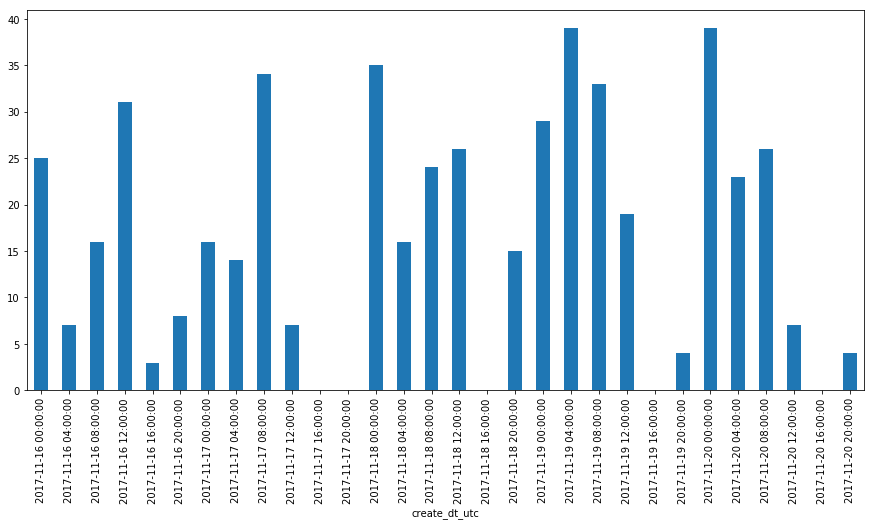

In [115]:
freq.plot(kind='bar', figsize=(15,7))

In [116]:
import time

In [118]:
time.timezone

-32400

In [122]:
from datetime import timedelta


KeyError: 'create_dt_utc'

In [125]:
washer['create_dt_ks'] = washer['create_dt_utc'] + timedelta(seconds = 32400) #9hr

In [128]:
washer['create_dt_ks']

0     2017-11-16 09:22:00
1     2017-11-16 09:32:00
2     2017-11-16 09:32:00
3     2017-11-16 11:48:00
4     2017-11-16 11:57:00
5     2017-11-16 11:57:00
6     2017-11-16 11:58:00
7     2017-11-16 11:58:00
8     2017-11-16 12:26:00
9     2017-11-16 12:57:00
10    2017-11-16 12:57:00
11    2017-11-16 20:14:00
12    2017-11-16 20:15:00
13    2017-11-16 20:30:00
14    2017-11-16 21:08:00
              ...        
485   2017-11-19 19:16:00
486   2017-11-20 12:51:00
487   2017-11-20 12:52:00
488   2017-11-20 13:51:00
489   2017-11-20 14:23:00
490   2017-11-20 14:32:00
491   2017-11-20 14:32:00
492   2017-11-20 19:17:00
493   2017-11-20 19:17:00
494   2017-11-20 19:17:00
495   2017-11-20 19:18:00
496   2017-11-20 20:19:00
497   2017-11-20 20:56:00
498   2017-11-20 21:04:00
499   2017-11-20 21:04:00
Name: create_dt_ks, Length: 500, dtype: datetime64[ns]

In [135]:
group = pd.Grouper(key = 'create_dt_ks', freq = '14400s')
freq = washer.groupby(group)['create_dt_ks'].count()
freq

create_dt_ks
2017-11-16 08:00:00    19
2017-11-16 12:00:00     6
2017-11-16 16:00:00     9
2017-11-16 20:00:00    44
2017-11-17 00:00:00     4
2017-11-17 04:00:00     8
2017-11-17 08:00:00     7
2017-11-17 12:00:00    23
2017-11-17 16:00:00    21
2017-11-17 20:00:00    20
2017-11-18 00:00:00     0
2017-11-18 04:00:00     0
2017-11-18 08:00:00    17
2017-11-18 12:00:00    28
2017-11-18 16:00:00    23
                       ..
2017-11-19 00:00:00     0
2017-11-19 04:00:00    13
2017-11-19 08:00:00    24
2017-11-19 12:00:00    43
2017-11-19 16:00:00    33
2017-11-19 20:00:00    22
2017-11-20 00:00:00     0
2017-11-20 04:00:00     0
2017-11-20 08:00:00    21
2017-11-20 12:00:00    39
2017-11-20 16:00:00    21
2017-11-20 20:00:00    18
2017-11-21 00:00:00     0
2017-11-21 04:00:00     0
2017-11-21 08:00:00     4
Freq: 14400S, Name: create_dt_ks, Length: 31, dtype: int64

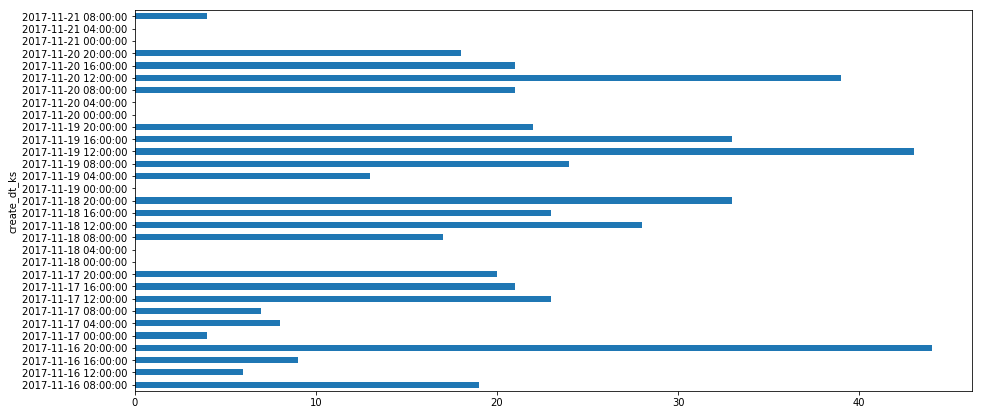

In [137]:
freq.plot(kind = 'barh', figsize = (15,7))

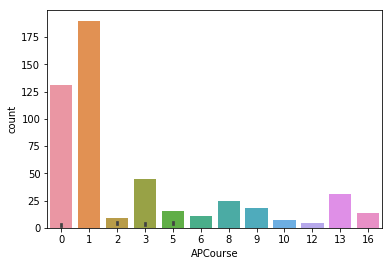

In [141]:
sns.barplot(data=washer, x='device_id', y='APCourse')
sns.countplot('APCourse', data = washer)